#### [Link]("https://pandas.pydata.org/docs/user_guide/groupby.html#splitting-an-object-into-groups")

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Splitting an object into groups

In [2]:
# vamos trabalhar com este dataframe

df = pd.DataFrame([('bird', 'Falconiformes', 389.0),
                    ('bird', 'Psittaciformes', 24.0),
                    ('mammal', 'Carnivora', 80.2),
                    ('mammal', 'Primates', np.nan),
                    ('mammal', 'Carnivora', 58)],
                   index=['falcon', 'parrot', 'lion', 'monkey', 'leopard'],
                   columns=('class', 'order', 'max_speed'))

In [3]:
# para criar um objeto de groupby teremos as seguintes opções como exemplo

grouped = df.groupby('class')
grouped = df.groupby('order', axis='columns')
grouped = df.groupby(['class', 'order'])

##### Nos referimos aos objetos agrupados como chaves (keys)

In [4]:
# vamos trabalhar com o seguinte dataframe
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [5]:
df

,A,B,C,D
0,foo,one,0.658242,0.639597
1,bar,one,0.056849,-0.299019
2,foo,two,0.215811,0.970972
3,bar,three,-0.192160,0.744175
4,foo,two,1.196601,-0.066035
5,bar,two,0.114333,-0.766762
6,foo,one,0.929177,0.143300
7,foo,three,1.152093,0.421383


##### Obtemos um objeto de agrupamento chamando groupby()
    Neste caso poderiamos agrupar as colunas A ou B ou ate mesmo ambas colunas

In [6]:
grouped = df.groupby(['B'])
grouped = df.groupby(['A', 'B'])

In [7]:
# no caso de multiindice, podemos especificar qual level do indice queremos agrupar
# observe que a divisao (split) do dataframe se dara por indice (rows), como default

df2 = df.set_index(['A', 'B'])
#-----------------------------
grouped = df2.groupby(level=df2.index.names.difference(['B'])) 

# ou

grouped = df2.groupby(level='A')
#-----------------------------
grouped.sum()

,C,D
A,,
bar,-0.020978,-0.321607
foo,4.151923,2.109218


In [8]:
# para que a divisao (split) se dê por colunas, vamos usar a função abaixo
# esta função pega uma letra e diz se ela é consoante ou vogal
# como o nome de nossas colunas sao em letras, podemos aplica-la ao nosso dataframe

def get_letter_type(letter):
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'consonant'

In [9]:
# so para ilustrar como a funcao se aplica aqui, observe que cada coluna faz a contagem entre vogais e consoantes

df.groupby(get_letter_type, axis=1).count()

,consonant,vowel
0,3,1
1,3,1
2,3,1
3,3,1
4,3,1
5,3,1
6,3,1
7,3,1


In [10]:
# agrupando indices com valores repetidos (non-unique), todos valores iguais serão tratados como um so grupo
# dessa forma, as funções agregadas serão aplicadas a esses grupos e retornam um índice único
# como exemplo observe a serie abaixo que tem indice com valores repetidos

lst = [1, 2, 3, 1, 2, 3]
s = pd.Series([1, 2, 3, 10, 20, 30], index=lst)
s

1     1
2     2
3     3
1    10
2    20
3    30
dtype: int64

In [11]:
# agrupando o indice
grouped = s.groupby(level=0)

In [12]:
grouped.first()

1    1
2    2
3    3
dtype: int64

In [13]:
grouped.last()

1    10
2    20
3    30
dtype: int64

In [14]:
# agora veja que a operacao foi aplicada a indices semelhantes
grouped.sum()

1    11
2    22
3    33
dtype: int64

#### GroupBy sorting

    Por default, as chaves dos grupos são organizadas durante a operação de agrupamento
    Podemos omitir essa propriedade passando o argumento 'sort=False'
        Isso pode ser util caso queiramos acelerar o processamento

In [15]:
# vejamos esse dataframe como exemplo
df2 = pd.DataFrame({'X':['B', 'B', 'A', 'A'], 'Y':[1, 2, 3, 4]})

In [16]:
# note que as chaves vem em ordem alfabetica
df2.groupby(['X']).sum()

,Y
X,
A,7
B,3


In [17]:
# agora note que as chaves vem na ordem original na criação do dataframe
df2.groupby(['X'], sort=False).sum()

,Y
X,
B,3
A,7


In [18]:
# note que sempre que o argumento sort estiver False, a ordem dos valores serao preservados como no original
# tomaremos o dataframe abaixo como exemplo
df3 = pd.DataFrame({'X':['A', 'B', 'A', 'B'], 'Y':[1, 4, 3, 2]})

In [19]:
# observe a ordem do indice e veja a ordem dos valores quando pegamos uma chave individual
df3.groupby('X').get_group('A')

,X,Y
0,A,1
2,A,3


In [20]:
df3.groupby('X').get_group('B')

,X,Y
1,B,4
3,B,2


#### GroupBy object attributes

O atributo groups retorna um dicionario em que as chaves sao os grupos unicos e os valores sao os respectivos indices
    - Veja os exemplos abaixo

In [21]:
grouped = df.groupby('A')

grouped.groups

{'bar': Int64Index([1, 3, 5], dtype='int64'),
 'foo': Int64Index([0, 2, 4, 6, 7], dtype='int64')}

In [22]:
df.groupby(get_letter_type, axis=1).groups

{'consonant': Index(['B', 'C', 'D'], dtype='object'),
 'vowel': Index(['A'], dtype='object')}

In [23]:
# para retornar uma lista dos grupos em vez de um dicionario
# neste caso aqui acessamos as chaves de um dicionario atraves do atributo keys

grouped.groups.keys()

dict_keys(['bar', 'foo'])

Por praticidade para sabermos o tamanho do nosso grupo, podemos aplicar o metodo len() ao objeto agrupado
    - Veja o exemplo abaixo

In [24]:
grouped = df.groupby(['A', 'B'])
grouped.sum()

C         D
A   B                        
bar one    0.056849 -0.299019
    three -0.192160  0.744175
    two    0.114333 -0.766762
foo one    1.587418  0.782898
    three  1.152093  0.421383
    two    1.412412  0.904938

In [25]:
grouped.groups

{('bar', 'one'): Int64Index([1], dtype='int64'),
 ('bar', 'three'): Int64Index([3], dtype='int64'),
 ('bar', 'two'): Int64Index([5], dtype='int64'),
 ('foo', 'one'): Int64Index([0, 6], dtype='int64'),
 ('foo', 'three'): Int64Index([7], dtype='int64'),
 ('foo', 'two'): Int64Index([2, 4], dtype='int64')}

In [26]:
len(grouped.groups)

6

#### GroupBy with Multiindex

In [27]:
# vamos trabalhar com a serie abaixo
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], 
         ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two',]]
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])
s = pd.Series(np.random.randn(8), index=index)
s

first  second
bar    one       0.321068
       two      -0.339654
baz    one      -0.345168
       two       1.295832
foo    one       1.003250
       two       0.955362
qux    one      -1.143665
       two       1.107337
dtype: float64

Podemos agrupar multiindice indicando o nivel conforme abaixo:

In [28]:
grouped = s.groupby(level=0)
grouped.sum()

first
bar   -0.018586
baz    0.950664
foo    1.958612
qux   -0.036327
dtype: float64

Se o indice for nomeado podemos indica-lo explicitamente no nivel, em vez de indicar o codigo do nivel:

In [29]:
grouped = s.groupby(level='second')
grouped.sum()

second
one   -0.164515
two    3.018878
dtype: float64

#### Grouping DataFrame with Index levels and columns

In [30]:
# vamos trabalhar com este dataframe

arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], 
         ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two',]]

index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])

df = pd.DataFrame({'A':[1, 1, 1, 1, 2, 2, 3, 3], 'B':np.arange(8)}, index=index)
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

Podemos agrupar colunas com niveis de multiindice passando o indice como objeto de pd.Grouper
    - Veja abaixo:

In [31]:
df.groupby([pd.Grouper(level=1), 'A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [32]:
# o indice pode ser especificado por nome tambem, e nao so numero

df.groupby([pd.Grouper(level='second'), 'A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [33]:
# o nome do indice tambem pode ser passado junto com o nome da coluna dentro de uma unica lista

df.groupby(['second', 'A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

#### DataFrame column selection in GroupBy
    - Uma vez criado o objeto GroupBy, para trabalhar com cada coluna separadamente podemos usar os colchetes --> []
        - Similar a escolher uma coluna num dataframe

In [34]:
grouped = df.groupby('A')
grouped_C = grouped['C']
grouped_D = grouped['D']
grouped_C.sum()

KeyError: 'Column not found: C'

In [ ]:
# os exemplos abaixo sao equivalentes e retornam o mesmo resultado, porem mais verbosos e lentos
#1
df['C'].groupby(df['A']).sum()
#2
df.groupby('A')['C'].sum()
#3
df.groupby('A').sum()['C']

### Iterating through groups
    - Quando fazemos a iteração podemos ver "dentro" do objeto e ver seus nomes e chaves

In [ ]:
df

In [ ]:
grouped = df.groupby('A')

In [ ]:
for name, group in grouped:
    print(name)
    print(group)

In [ ]:
# observe o resultado acima e compare com o resultado do atributo groups
grouped.groups

In [ ]:
# so por curiosidade, se quiser somente o nome de cada grupo
grouped.apply(lambda x: x.name)

In [ ]:
# no caso de objetos com multiindice, o nome de cada grupo sera uma tupla

for name, group in df.groupby(['A', 'B']):
    print(name)
    print(group)

In [ ]:
df.groupby(['A', 'B']).sum()

In [ ]:
df

### Selecting a group
    - Para selecionar um grupo especifico use a função get_group()

In [ ]:
grouped = df.groupby('A')

In [ ]:
# vamos ver quais grupos estao no nosso objeto
grouped.groups

In [ ]:
# agora vamos escolher um grupo usando nosso metodo
grouped.get_group('bar')

Atenção: Para multindices o processo eh o mesmo, basta passar uma tupla como argumento de get_group()

In [36]:
# vamos trabalhar com este dataframe como exemplo

ex = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [37]:
ex.groupby(['A', 'B']).get_group(('bar', 'one'))

,A,B,C,D
1,bar,one,2.382999,-0.676052


### Aggregation
    - Uma vez criado o objeto, podemos fazer calculos e aplicar funcoes atraves do metodo aggregate() ou agg()

In [ ]:
# veja os exemplos abaixo
ex.groupby('A').aggregate(np.sum)

In [ ]:
grupo = ex.groupby(['A', 'B'])
grupo.aggregate(np.sum)

Note que, no caso de agrupamento multiplo, como acima, obtemos de volta um dataframe de multiindice
    - Se quiser que isso seja evitado use a opção as_index como False

In [ ]:
# note que as colunas A e B nao sao mais multiindices
grupo = ex.groupby(['A', 'B'], as_index=False)
grupo.agg(np.sum)

In [ ]:
# so para referencia, o exemplo abaixo eh equivalente ao superior
ex.groupby(['A', 'B'], as_index=False).sum()

In [ ]:
# para atingir o mesmo resultado de cima tambem podemos usar a funcao reset_index()
ex.groupby(['A', 'B']).sum().reset_index()

In [ ]:
# outra opcao simples e util para saber o tamanho de cada grupo eh a funcao size()
ex.groupby(['A', 'B']).size()

In [ ]:
# para uma estatistica descritiva e detalhada de cada coluna use o metodo describe()
ex.groupby(['A', 'B']).describe()

#### Applying multiple functions at once
    - Com aggregate() tambem podemos passar uma lista ou dicionario de funcoes para o nosso objeto

In [ ]:
# com agg podemos passar uma lista de funcoes que serao aplicadas a cada coluna do objeto
grupo = ex.groupby('A')
grupo.agg(['sum', 'mean'])

In [ ]:
# equivalente ao exemplo de cima, mas agora aplicando somente a coluna C
grupo['C'].agg([np.sum, np.mean, np.std])

In [ ]:
# com o metodo rename eh possivel renomear as colunas que levam os nomes das funcoes
(grupo.agg([np.sum, np.prod, np.std]).rename(columns=
                                             {'sum':'soma', 'prod':'multiplicacao', 'std':'desvio_padrao'}))

#### Named Aggregation
    - Podemos criar novas colunas a partir da aplicação de funções individuais para cada coluna do nosso objeto
            - Isso é possível com o método pandas.NamedAgg que pede uma tupla de dois argumentos
            - Essa tupla deve conter o nome da coluna e a função a ser aplicada na mesma
            
    - O nome da nova coluna é indicado dentro da função agg() como ilustrado abaixo

In [ ]:
# vamos trabalhar com esse dataframe

animals = pd.DataFrame({'especie':['gato', 'cachorro', 'gato', 'cachorro'], 'altura':[9.1, 6.0, 9.5, 34.0],
                       'peso':[7.9, 7.5, 9.9, 198.0]})
animals

In [ ]:
# agora vamos criar um objeto GroupBy
grupo = animals.groupby('especie')

In [ ]:
# aqui vamos aplicar o metodo agg() ao nosso objeto
# dentro de agg() vamos indicar o nome de cada nova coluna e só então aplicar o pd.NamedAgg()
# como pode ver, NamedAgg pede o nome da coluna e a função que será aplicada na mesma

grupo.agg(altura_min=pd.NamedAgg(column='altura', aggfunc=np.min), 
          peso_maximo=pd.NamedAgg(column='peso', aggfunc=np.max), 
          media_peso=pd.NamedAgg(column='peso', aggfunc=np.mean))

In [ ]:
# NamedAgg tambem aceita os nomes puros das colunas e funções a serem trabalhadas
grupo.agg(altura_min=pd.NamedAgg('altura', 'min'), peso_maximo=pd.NamedAgg('peso', np.max))

In [ ]:
# em series o procedimento é mais simples
# não precisa selecionar a coluna, pois isto ja é feito antes de aplicar a função agg
# então, basta somente passar os nomes das novas colunas e a função que será aplicada
animals.groupby('especie').altura.agg(altura_maximo='max', altura_minima='min')

#### Applying different functions to DataFrame columns
    - Passando um dicionario para aggregate podemos aplicar uma funcao diferente para cada coluna do dataframe
        - Cada chave do dicionario representa uma coluna do DF

In [39]:
grouped = ex.groupby('A')

In [41]:
grouped.agg({'C':np.sum, 'D':'prod'})

,C,D
A,,
bar,0.902458,0.435856
foo,0.213791,0.328514


#### Cython-optimized aggregation functions
    - Funcoes que podem ser aplicadas diretamente ao objeto sem precisar chamar "apply"

In [63]:
ex.groupby('A', sort=False).sum()

,C,D
A,,
foo,0.213791,-3.801349
bar,0.902458,-0.802147


### Transformation
    - Retorna um objeto que eh do mesmo tamanho do dataframe original
    - Para comparacao, o metodo "apply" aplica uma funcao e faz uma reducao do dataframe original

In [112]:
index = pd.date_range('10/01/1999', periods=1100)
ts = pd.Series(np.random.normal(0.5, 2, 1100), index=index)

In [113]:
ts = ts.rolling(window=100, min_periods=100).mean().dropna()

In [129]:
transformed = (ts.groupby(lambda x: x.year).transform(lambda x: (x - x.mean()) / x.std()))

In [152]:
# veja que, apesar de estar agrupado por ano (somente 3 anos diferentes), o objeto tem o mesmo tamanho do df original
transformed

2000-01-08   -0.076589
2000-01-09    0.044992
2000-01-10   -0.032064
2000-01-11   -0.113912
2000-01-12    0.101048
                ...   
2002-09-30   -1.637057
2002-10-01   -1.882829
2002-10-02   -1.668099
2002-10-03   -2.007689
2002-10-04   -1.760619
Freq: D, Length: 1001, dtype: float64

In [139]:
# neste caso aqui, sem o metodo transform, o objeto traz uma reducao do df original
ts.groupby(lambda x: x.year).std()

2000    0.156575
2001    0.164729
2002    0.106872
dtype: float64

In [145]:
paises = np.array(['BR', 'US', 'PT', 'FR'])
key = paises[np.random.randint(0,4,1001)]

In [146]:
grupo = ts.groupby(key)

In [151]:
# mais uma vez, usando o agrupamento normal, todo o df eh reduzido
grupo.std()

BR    0.174695
FR    0.174868
PT    0.181959
US    0.172930
dtype: float64

In [158]:
# mesmo com funcoes que dao resultado reduzidos, como maximo e minimo, o metodo transform retorna o tamanho original
ts.groupby(lambda x: x.year).transform(lambda x: x.max() - x.min())

2000-01-08    0.665873
2000-01-09    0.665873
2000-01-10    0.665873
2000-01-11    0.665873
2000-01-12    0.665873
                ...   
2002-09-30    0.491810
2002-10-01    0.491810
2002-10-02    0.491810
2002-10-03    0.491810
2002-10-04    0.491810
Freq: D, Length: 1001, dtype: float64

In [159]:
# aqui um exemplo mais simples usando somente a funcao max()
ts.groupby(lambda x: x.year).transform(lambda x: x.max())

2000-01-08    0.760934
2000-01-09    0.760934
2000-01-10    0.760934
2000-01-11    0.760934
2000-01-12    0.760934
                ...   
2002-09-30    0.989857
2002-10-01    0.989857
2002-10-02    0.989857
2002-10-03    0.989857
2002-10-04    0.989857
Freq: D, Length: 1001, dtype: float64

In [160]:
# aqui temos o agrupamento padrao com reducao do dataframe original
# vemos que o resultado retorna somente um valor para cada grupo
ts.groupby(lambda x: x.year).max()

2000    0.760934
2001    0.998720
2002    0.989857
dtype: float64

In [161]:
# outra funcao muito util de transform eh preencher valores NA
# vamos trabalhar com o dataframe abaixo
index = np.arange(1000)

In [197]:
data_df = pd.DataFrame({'A':np.random.randn(1000), 'B':np.random.randn(1000), 
                        'C':np.random.randn(1000)}, index=index)
data_df.iloc[1,2] = np.nan
data_df.iloc[3,2] = np.nan
data_df.iloc[2,0] = np.nan
data_df.iloc[40,2] = np.nan
data_df.iloc[55,0] = np.nan
data_df.iloc[10,0] = np.nan
data_df.iloc[11,2] = np.nan

In [204]:
data_df

,A,B,C
0,0.618015,0.741302,1.275758
1,0.207654,1.092967,NaN
2,NaN,0.518637,0.747736
3,0.179899,-0.994406,NaN
4,-0.449067,-0.129207,0.927948
...,...,...,...
995,0.311304,0.842618,0.090545
996,0.524956,-0.839908,0.060768
997,-0.478619,1.203283,1.173859
998,0.629036,-0.552882,1.473672


In [207]:
# vamos criar essa lista de sigla de paises que funcionara como um indice
key = paises[np.random.randint(0,4,1000)]

In [209]:
# agora vamos agrupar aleatoriamente ao nosso dataframe
agrupado = data_df.groupby(key)
agrupado.count()

,A,B,C
BR,251,251,250
FR,245,245,245
PT,251,252,252
US,250,252,249


In [234]:
# aqui vamos preencher os valores NA com a media geral
transformed = agrupado.transform(lambda x: x.fillna(x.mean()))
# aqui vamos pegar o dataframe transformed e agrupa-lo na chave de paises criada acima
agrupado_trans = transformed.groupby(key)

In [237]:
# observe que a media do objeto "transformado" eh igual a media do dataframe original
# apesar disso, o objeto "transformado" eliminou todos valores NA
agrupado.mean()

,A,B,C
BR,-0.095606,-0.099871,0.106363
FR,0.036751,0.019810,-0.079615
PT,0.019474,-0.028350,-0.023889
US,0.017543,-0.087497,0.009887


In [238]:
agrupado_trans.mean()

,A,B,C
BR,-0.095606,-0.099871,0.106363
FR,0.036751,0.019810,-0.079615
PT,0.019474,-0.028350,-0.023889
US,0.017543,-0.087497,0.009887


In [239]:
# perceba que o original tem alguem pontos faltando
agrupado.count()

,A,B,C
BR,251,251,250
FR,245,245,245
PT,251,252,252
US,250,252,249


In [240]:
# ja no objeto "transformado" todos os pontos sao preenchidos
agrupado_trans.count()

,A,B,C
BR,251,251,251
FR,245,245,245
PT,252,252,252
US,252,252,252


#### Window and Resample Operations
    - Podemos aplicar os metodos resample(), expanding() e rolling() aos nossos objetos de GroupBy

In [247]:
# trabalharemos com este dataframe
df_re = pd.DataFrame({'A':[1] * 10 + [5] * 10, 'B':np.arange(20)})
df_re

,A,B
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9


In [246]:
# aqui vamos agrupar esta coluna A e aplicar o metodo rolling() para tirar a media de B
df_re.groupby('A').rolling(4)['B'].mean()

A    
1  0      NaN
   1      NaN
   2      NaN
   3      1.5
   4      2.5
   5      3.5
   6      4.5
   7      5.5
   8      6.5
   9      7.5
5  10     NaN
   11     NaN
   12     NaN
   13    11.5
   14    12.5
   15    13.5
   16    14.5
   17    15.5
   18    16.5
   19    17.5
Name: B, dtype: float64

In [253]:
# aqui aplicamos o metodo expanding
df_re.groupby('A')['B'].expanding().sum()

A    
1  0       0.0
   1       1.0
   2       3.0
   3       6.0
   4      10.0
   5      15.0
   6      21.0
   7      28.0
   8      36.0
   9      45.0
5  10     10.0
   11     21.0
   12     33.0
   13     46.0
   14     60.0
   15     75.0
   16     91.0
   17    108.0
   18    126.0
   19    145.0
Name: B, dtype: float64

In [284]:
# agora veremos uma aplicacao do metodo resample()
# resample eh o metodo em que vc pode reorganizar a linha do tempo com a frequencia desejada
# neste caso abaixo, vamos criar o dataframe baseado em frequencia semanal
df_re = pd.DataFrame({'date':pd.date_range('01-01-2016', periods=4, freq='W'), 'group':[1, 1, 2, 2,], 
                     'val':[5, 6, 7, 8]}).set_index('date')

In [285]:
df_re

,group,val
date,,
2016-01-03,1,5
2016-01-10,1,6
2016-01-17,2,7
2016-01-24,2,8


In [300]:
# aqui vamos reorganizar o tempo para uma frequencia de cada 2 dias
df_re.groupby('group').resample('2D').ffill()

group  val
group date                  
1     2016-01-03      1    5
      2016-01-05      1    5
      2016-01-07      1    5
      2016-01-09      1    5
2     2016-01-17      2    7
      2016-01-19      2    7
      2016-01-21      2    7
      2016-01-23      2    7

### Filtration
    - Como o proprio nome ja diz, este metodo filtra os dados de acordo com as condicoes passadas
    - Aceita como argumento uma funcao ou lambda que sera aplicada a um grupo e retornara True ou False
        - O output provem deste resultado booleano

In [301]:
# vamos usar esta serie como exemplo
# suponha que queiramos selecionar valores cujos grupos somam maior que 2
sf = pd.Series([1, 1, 2, 3, 3, 3])
sf

0    1
1    1
2    2
3    3
4    3
5    3
dtype: int64

In [304]:
# vamos traduzir a condicao acima na nossa filtragem do objeto
sf.groupby(sf).filter(lambda x: x.sum() > 2)

3    3
4    3
5    3
dtype: int64

In [484]:
# neste exemplo nos agrupamos a coluna first, que tem 4 grupos 
# depois aplicamos o filtro para somente retornar os grupos cuja soma da coluna A seja maior que 3
df.groupby('first').filter(lambda x: x['A'].sum() > 3)

A  B
first second      
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

Este 'x' aí da função lambda corresponde ao dataframe gerado

Veja abaixo para ilustrar que é gerado um dataframe para cada grupo

In [487]:
df.groupby('first').filter(lambda x: print(type(x)))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,,A,B
first,second,,


### Dispatching to instance methods
    - Como o proprio nome diz, esta seção trata do "despacho" das funções, ou seja, da aplicação destas em cada grupo
    - Usando aggregate ou transform vc pode querer aplicar uma única função para cada grupo
    - Isto torna-se simples com o uso de lambda

In [493]:
# aqui aplicamos o desvio padrao e este sera aplicado para todas as colunas de todo dataset
agrupado.agg(lambda x: x.std())

,A,B,C
BR,1.078806,1.017561,0.997474
FR,0.957935,0.957254,0.950464
PT,0.955315,1.026525,1.043003
US,0.982750,1.067226,0.995665


In [494]:
# no entanto, o modelo acima pode ser muito verboso e pode confundir para passar argumentos adicionais
# o metodo abaixo "despacha" a função para todos os grupos de forma mais sucinta
agrupado.std()

,A,B,C
BR,1.078806,1.017561,0.997474
FR,0.957935,0.957254,0.950464
PT,0.955315,1.026525,1.043003
US,0.982750,1.067226,0.995665


    - O que aconteceu acima foi que um "empacotador" de funções foi gerado
    - Os resultados então são combinados no estilo "apply" --> "combine" padrão de GroupBy
    - Esta forma de "despacho" permite que façamos operações de forma mais simples conforme abaixo

In [498]:
df0 = pd.DataFrame(np.random.randn(1000, 3), 
                   index=pd.date_range('01-01-2006', periods=1000), columns=list('ABC'))
df0.iloc[::2] = np.nan
df0.head()

,A,B,C
2006-01-01,NaN,NaN,NaN
2006-01-02,0.379011,0.621862,-0.248023
2006-01-03,NaN,NaN,NaN
2006-01-04,0.726802,-0.114993,-0.357761
2006-01-05,NaN,NaN,NaN


In [499]:
grouped = df0.groupby(lambda x: x.year)

In [505]:
# veja como fica bem mais simples ao aplicarmos a função diretamente ao objeto
# aqui nós agrupamos por ano e então aplicamos a função de forma independente a cada grupo
# utilizar a função lambda também seria correto, mas muito verboso e sujeito a erro
grouped.fillna(method='ffill')

,A,B,C
2006-01-01,NaN,NaN,NaN
2006-01-02,0.379011,0.621862,-0.248023
2006-01-03,0.379011,0.621862,-0.248023
2006-01-04,0.726802,-0.114993,-0.357761
2006-01-05,0.726802,-0.114993,-0.357761
...,...,...,...
2008-09-22,0.405336,-0.807099,0.273357
2008-09-23,0.405336,-0.807099,0.273357
2008-09-24,-1.332373,-0.347479,0.567665
2008-09-25,-1.332373,-0.347479,0.567665


### Flexible apply
    - Quando não é possível usar certas funções em aggregate ou transform, o método apply pode ser usado
    - O método apply lida com algumas exceções que aggregate e transform não conseguem

In [510]:
# por exemplo vamos trabalhar com o dataframe abaixo
dfx

,first,second,A,B
0,bar,one,1,0
1,bar,two,1,1
2,baz,one,1,2
3,baz,two,1,3
4,foo,one,2,4
5,foo,two,2,5
6,qux,one,3,6
7,qux,two,3,7


In [518]:
# uma das funções que só da para trabalhar com apply é .describe()
grupo['B'].apply(lambda x: x.describe())

first       
bar    count    2.000000
       mean     0.500000
       std      0.707107
       min      0.000000
       25%      0.250000
       50%      0.500000
       75%      0.750000
       max      1.000000
baz    count    2.000000
       mean     2.500000
       std      0.707107
       min      2.000000
       25%      2.250000
       50%      2.500000
       75%      2.750000
       max      3.000000
foo    count    2.000000
       mean     4.500000
       std      0.707107
       min      4.000000
       25%      4.250000
       50%      4.500000
       75%      4.750000
       max      5.000000
qux    count    2.000000
       mean     6.500000
       std      0.707107
       min      6.000000
       25%      6.250000
       50%      6.500000
       75%      6.750000
       max      7.000000
Name: B, dtype: float64

    - apply pode funcionar como redutor, transformador ou filtro, dependendo do que é passado para ele
    - Ou seja, é uma função mais flexível para os objetos GroupBy

### Other useful features

#### Automatic exclusion of “nuisance” columns
    - Existe uma propriedade de GroupBy que exclui algumas colunas em que a função passada não se aplica
        - Como calcular o desvio padrão por exemplo. Qualquer coluna não numérica será excluída do cálculo

In [519]:
# por exemplo vamos usar nosso dataframe abaixo
dfx

,first,second,A,B
0,bar,one,1,0
1,bar,two,1,1
2,baz,one,1,2
3,baz,two,1,3
4,foo,one,2,4
5,foo,two,2,5
6,qux,one,3,6
7,qux,two,3,7


In [521]:
# ao calcular o desvio padrao, somente as colunas numéricas serão consideradas
# veja que a coluna 'second' foi sileciosamente excluída
dfx.groupby('first').std()

,A,B
first,,
bar,0.0,0.707107
baz,0.0,0.707107
foo,0.0,0.707107
qux,0.0,0.707107


Importante notar que:
    - df.groupby('A')['nome_coluna'].std() é melhor que df.groupby('A').std()['nome_coluna']
    - Ou seja, se uma função interessa somente a uma coluna, é melhor filtrá-la antes de aplicar a função

#### Handling of (un)observed Categorical values
    - Agrupando dados categoricos, o argumento "observed" controla se retorna todos valores possíveis ou apenas observáveis

In [7]:
# por exemplo vamos criar uma serie e agrupa-la por categorias
# veja que mesmo com 0 observações (ocorrências), a função retorna 'b'
pd.Series([1, 1, 1]).groupby(pd.Categorical(['a', 'a', 'a'], categories=['a', 'b']),
                            observed=False).count()

a    3
b    0
dtype: int64

In [9]:
# agoa veja abaixo a mesma expressao, mas agora com o argumento "observed" como True
pd.Series([1, 1, 1]).groupby(pd.Categorical(['a', 'a', 'a'], categories=['a', 'b']),
                            observed=True).count()

a    3
dtype: int64

#### NA and NaT group handling
    - Nao existe agrupamento de valores NaN ou NaT

#### Grouping with ordered factors
#### [Link Documentation](https://pandas.pydata.org/docs/user_guide/groupby.html#automatic-exclusion-of-nuisance-columns)
#### [Link Stackoverflow](https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut)

#### Grouping with a grouper specification
    - Esta função facilita o trabalho com time series principalmente
    - Com ela podemos transformar uma serie de tempo para uma frequencia desejada na analise dos dados
    - Ela é bastante similar ao método resample(), porém mais prática

In [4]:
# vamos trabalhar com nossos dados de movimentação no porto do açu
# depois de nomear o dataframe para "prumo" vamos converter os dados da coluna de departure
prumo = pd.read_csv('prumo_marco29.csv')
prumo['departure'] = pd.to_datetime(prumo['departure'])

In [5]:
# aqui agrupamos o DF em "terminal" e dividimos a frequencia do tempo por semana
# dai entao filtramos uma coluna desejada ("vessel") para aplicarmos a função de count()
# os dados abaixo mostram a quantidade de navios por terminal e por semana
prumo.groupby(['terminal', pd.Grouper(key='departure', freq='W')])['vessel'].count()

terminal  departure 
B-PORT    2020-03-29    36
          2020-04-05    41
          2020-04-12    47
          2020-04-19    38
          2020-04-26    34
                        ..
TECMA     2020-04-05     1
          2020-04-26     1
          2020-05-03     1
          2020-05-10     1
          2020-05-17     1
Name: vessel, Length: 62, dtype: int64

#### Taking the first rows of each group
    - Esta parte da documentação somente deixa claro que é possível usar os métodos head() e tail() num objeto GroupBy
    - Caso queira visualizar rapidamente quais são as primeiras ou últimas linhas de um objeto

#### Taking the nth row of each group
    - Este metodo seleciona a linha desejada para cada grupo do objeto

In [6]:
grupo = prumo.groupby('agency')

In [7]:
# por exemplo, aqui eu quero a ultima linha de cada grupo
grupo.nth(-1)

,vessel,type,loa,beam,draft,arrival,berthing,departure,terminal,waiting_time,berthed_time
agency,,,,,,,,,,,
BPA AGENCIAMENTOS,BBC DELAWARE,Multipurpose,138.48,21.55,6.1,2020-03-23 22:22:00,2020-03-24 08:55:00,2020-03-24 23:35:00,T-MULT,633.0,880.0
BRAM OFFSHORE,Bram Bahia,PSV,92.58,18.29,5.6,2020-03-23 08:14:00,2020-03-23 10:55:00,2020-03-24 07:00:00,B-PORT,161.0,1205.0
GAC,TORDIS KNUTSEN,Petroleiro,284.32,48.90,16.6,2020-03-26 10:39:00,2020-03-31 15:15:00,2020-04-02 09:10:00,T-OIL,7476.0,2515.0
LBH BRASIL,SEA TRIUMPH,Graneleiro,291.98,45.00,18.3,2020-03-14 07:15:00,2020-03-19 19:30:00,2020-03-24 06:20:00,T-ORE,7935.0,6410.0
Orion Rodos,BAMBOO STAR,Graneleiro,180.00,30.00,9.7,2020-04-08 16:31:00,2020-04-09 09:30:00,2020-04-12 05:10:00,T-MULT,1019.0,4060.0
PORT LOGISTIC,FAR SCOTSMAN,PSV,81.70,18.00,5.5,2020-03-29 19:30:00,2020-03-30 08:25:00,2020-03-30 17:25:00,B-PORT,775.0,540.0
PROAMAR,Starnav Hydra,PSV,90.00,19.00,5.9,2020-03-23 22:36:00,2020-03-24 01:01:00,2020-03-24 11:40:00,B-PORT,145.0,639.0
Portmar Agência Marítima,SISTAC ESPERANÇA,Rebocador,25.00,6.00,3.0,2020-04-01 23:40:00,2020-04-02 14:45:00,2020-04-02 17:15:00,B-PORT,905.0,150.0
RLOG,Skandi Ipanema,AHTS,74.30,17.04,5.5,2020-05-09 17:07:00,2020-05-09 20:10:00,2020-05-10 04:50:00,B-PORT,183.0,520.0


Para tratar de valores nulos, utilize a opção "dropna" dentro do metodo .nth()
    - "any" e "all" são utilizados como argumentos
        - any --> dropa as linhas onde qualquer valor seja nulo
        - all --> dropa as linhas onde todos valores sao nulos

In [9]:
# veja exemplo abaixo
# este codigo retorna a ultima linha de cada grupo e dropa qualquer linha que tenha pelo menos um valor nulo
grupo.nth(-1, dropna='any')

,vessel,type,loa,beam,draft,arrival,berthing,departure,terminal,waiting_time,berthed_time
agency,,,,,,,,,,,
BPA AGENCIAMENTOS,BBC DELAWARE,Multipurpose,138.48,21.55,6.1,2020-03-23 22:22:00,2020-03-24 08:55:00,2020-03-24 23:35:00,T-MULT,633.0,880.0
BRAM OFFSHORE,Bram Bahia,PSV,92.58,18.29,5.6,2020-03-23 08:14:00,2020-03-23 10:55:00,2020-03-24 07:00:00,B-PORT,161.0,1205.0
GAC,TORDIS KNUTSEN,Petroleiro,284.32,48.90,16.6,2020-03-26 10:39:00,2020-03-31 15:15:00,2020-04-02 09:10:00,T-OIL,7476.0,2515.0
LBH BRASIL,SEA TRIUMPH,Graneleiro,291.98,45.00,18.3,2020-03-14 07:15:00,2020-03-19 19:30:00,2020-03-24 06:20:00,T-ORE,7935.0,6410.0
Orion Rodos,BAMBOO STAR,Graneleiro,180.00,30.00,9.7,2020-04-08 16:31:00,2020-04-09 09:30:00,2020-04-12 05:10:00,T-MULT,1019.0,4060.0
PORT LOGISTIC,FAR SCOTSMAN,PSV,81.70,18.00,5.5,2020-03-29 19:30:00,2020-03-30 08:25:00,2020-03-30 17:25:00,B-PORT,775.0,540.0
PROAMAR,Starnav Hydra,PSV,90.00,19.00,5.9,2020-03-23 22:36:00,2020-03-24 01:01:00,2020-03-24 11:40:00,B-PORT,145.0,639.0
Portmar Agência Marítima,SISTAC ESPERANÇA,Rebocador,25.00,6.00,3.0,2020-04-01 23:40:00,2020-04-02 14:45:00,2020-04-02 17:15:00,B-PORT,905.0,150.0
RLOG,Skandi Ipanema,AHTS,74.30,17.04,5.5,2020-05-09 17:07:00,2020-05-09 20:10:00,2020-05-10 04:50:00,B-PORT,183.0,520.0


In [28]:
# este codigo retorna a ultima linha de cada grupo e dropa linhas em que todos valores sejam NaN
grupo.nth(0, dropna='all')

,vessel,type,loa,beam,draft,arrival,berthing,departure,terminal,waiting_time,berthed_time
agency,,,,,,,,,,,
BPA AGENCIAMENTOS,BBC DELAWARE,Multipurpose,138.48,21.55,6.10,2020-03-23 22:22:00,2020-03-24 08:55:00,2020-03-24 23:35:00,T-MULT,633.0,880.0
BRAM OFFSHORE,Thor Supplier,PSV,84.00,18.00,4.70,2020-05-21 16:20:00,2020-05-22 17:20:00,2020-05-22 19:50:00,FUNDEADOURO 11,1500.0,150.0
GAC,MONTE ULIA,Petroleiro,274.00,48.00,16.70,2020-05-12 11:34:00,2020-05-15 09:00:00,2020-05-16 16:20:00,T-OIL,4166.0,1880.0
LBH BRASIL,Mother M,Graneleiro,180.00,30.00,6.70,2020-05-21 01:03:00,2020-05-22 08:12:00,2020-05-22 15:05:00,T-ORE,1869.0,413.0
Orion Rodos,ULTRA ROCANVILLE,Graneleiro,199.98,32.26,12.94,2020-05-17 04:56:00,2020-05-17 08:10:00,2020-05-20 05:06:00,T-MULT,194.0,4136.0
PORT LOGISTIC,Up Coral,PSV,87.00,19.00,5.50,2020-04-28 10:21:00,2020-04-28 13:30:00,2020-04-29 00:45:00,B-PORT,189.0,675.0
PROAMAR,STARNAV ANDROMEDA,PSV,90.00,19.00,5.80,2020-05-21 09:28:00,2020-05-22 09:10:00,2020-05-22 21:05:00,B-PORT,1422.0,715.0
Portmar Agência Marítima,SISTAC ESPERANÇA,Rebocador,25.00,6.00,1.30,2020-04-12 11:21:00,2020-04-16 01:10:00,2020-04-16 04:24:00,INTERMOOR,5149.0,194.0
RLOG,Skandi Ipanema,AHTS,74.30,17.04,5.50,2020-05-14 05:44:00,2020-05-15 23:15:00,2020-05-16 02:30:00,B-PORT,2491.0,195.0


In [30]:
# agora se quisermos pegar mais de uma linha do grupo, so passar uma lista
grupo.nth([1, 3, 5])

,vessel,type,loa,beam,draft,arrival,berthing,departure,terminal,waiting_time,berthed_time
agency,,,,,,,,,,,
BRAM OFFSHORE,Campos Contender,PSV,74.52,17.12,5.60,2020-05-21 09:05:00,2020-05-21 11:18:00,2020-05-22 05:15:00,B-PORT,133.0,1077.0
BRAM OFFSHORE,Santos Supporter,PSV,84.73,18.29,4.70,2020-05-19 17:51:00,2020-05-20 18:00:00,2020-05-21 06:45:00,B-PORT,1449.0,765.0
BRAM OFFSHORE,Santos Supplier,PSV,85.00,18.00,4.40,2020-05-18 08:23:00,2020-05-18 15:55:00,2020-05-19 03:00:00,B-PORT,452.0,665.0
GAC,Lisboa,Petroleiro,279.00,48.00,16.80,2020-05-12 20:37:00,2020-05-15 12:36:00,2020-05-16 13:30:00,T-OIL,3839.0,1494.0
GAC,Cap Philippe,Petroleiro,274.29,48.00,15.75,2020-05-05 22:02:00,2020-05-11 18:36:00,2020-05-14 07:18:00,T-OIL,8434.0,3642.0
GAC,Front Duke,Petroleiro,333.08,60.04,16.20,2020-05-05 15:39:00,2020-05-07 10:24:00,2020-05-10 10:00:00,T-OIL,2565.0,4296.0
LBH BRASIL,FURIOUS,Graneleiro,287.00,45.00,17.72,2020-04-19 18:52:00,2020-04-27 08:22:00,2020-04-28 14:18:00,T-ORE,10890.0,1796.0
LBH BRASIL,CORONET,Graneleiro,292.00,45.00,17.71,2020-05-20 06:25:00,2020-05-20 11:50:00,2020-05-22 13:22:00,T-ORE,325.0,2972.0
LBH BRASIL,CAPE TRUST,Graneleiro,288.97,45.00,18.05,2020-05-03 18:55:00,2020-05-05 18:10:00,2020-05-08 07:26:00,T-ORE,2835.0,3676.0


#### Enumerate group items
    - Para saber em que ordem cada linha aparece em cada grupo use cumcount()
    - Aparentemente nao tem muita utilidade, mas eh bom saber como usar e para que serve este metodo

In [35]:
# vamos trabalhar com este dataframe simples
df = pd.DataFrame(list('aaabba'), columns=['A'])
df

,A
0,a
1,a
2,a
3,b
4,b
5,a


In [36]:
# agora agrupamos os valores da coluna A e aplicamos o metodo cumcount()
# nosso objeto tem 2 grupos, a e b
# ao aplicamos o metodo, vemos em que linha cada elemento de cada grupo esta localizado
# por exemplo veja a linha 5 abaixo. Ela diz que elemento desta linha, que eh go grupo a, esta no indice 3 de seu grupo
df.groupby('A').cumcount()

0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

#### Enumerate groups
    - Com o metodo ngroup() identificamos a posição do grupo de cada respectivo elemento
    - Por exemplo, um objeto tem varios grupos e cada grupo tem uma ordem de ordem como num índice
    - O método ngroup() indica qual é esse índice

In [39]:
# no exemplo abaixo considere a linha 5 novamente
# ela nos indica que o elemento daquela linha, que seria a, pertence ao primeiro grupo (indice 0)
df.groupby('A').ngroup()

0    0
1    0
2    0
3    1
4    1
5    0
dtype: int64

#### Plotting
    - GroupBy funciona com alguns comandos de visualização
    - Vamos usar boxplot neste exemplo

In [41]:
# suponha que estejamos suspeitando que os valores do grupo 'B' da coluna estejam numa media 3 vezes maior
# vamos ilustrar abaixo o enunciado acima
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(50, 2))
df['g'] = np.random.choice(['A', 'B'], size=50)
df.loc[df['g'] == 'B', 1] += 3

A         AxesSubplot(0.1,0.15;0.363636x0.75)
B    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

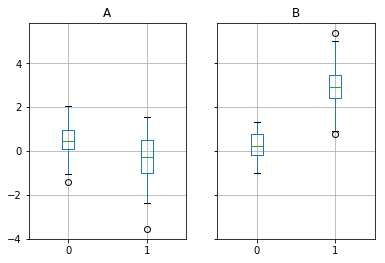

In [46]:
# agora usamos boxplot para visualizar esta discrepancia
df.groupby('g').boxplot()

#### Piping function calls
    - Função muito parecida com a de apply() em objetos
    - Muito útil quando queremos reutilizar objetocs agrupados
    - pipe() facilita fazermos num passo só o que seria feito em várias etapas

In [49]:
# imagine ter um DF com dados de loja, prorduto, venda e quantidade
# queremos agrupar por loja e produto e saber o preço médio vendido por loja e por produto
n = 1000
df = pd.DataFrame({'Store': np.random.choice(['Store_1', 'Store_2'], n), 
                   'Product': np.random.choice(['Product_1', 'Product_2'], n),
                  'Revenue': (np.random.random(n) * 50 + 10).round(2), 'Quantity': np.random.randint(1, 10, n)})
df.head(5)

,Store,Product,Revenue,Quantity
0,Store_1,Product_1,33.19,5
1,Store_2,Product_2,52.56,8
2,Store_1,Product_1,56.46,8
3,Store_2,Product_2,16.43,9
4,Store_1,Product_1,15.20,5


In [53]:
# para ter uma ideia, aqui temos o objeto agrupado por loja/produto
# depois aplicamos uma soma simples 
df.groupby(['Store', 'Product']).sum()

Revenue  Quantity
Store   Product                     
Store_1 Product_1  9445.94      1249
        Product_2  7881.61      1185
Store_2 Product_1  8930.50      1300
        Product_2  8398.83      1169

In [70]:
# aqui fazemos a operação do enunciado da questão
# veja que reaproveitamos o objeto para fazer as operações dentro de pipe
# apos isso fazemos o unstack para mudar a disposição das colunas
# depois arredondamos para que tenha 2 casas decimais
df.groupby(['Store', 'Product']).pipe(lambda grp: grp.Revenue.sum() / grp.Quantity.sum()).unstack().round(2)

Product,Product_1,Product_2
Store,,
Store_1,7.56,6.65
Store_2,6.87,7.18


### Examples

#### Regrouping by factor
    - Podemos agrupar colunas de um DF de acordo com sua respectiva soma

In [73]:
df = pd.DataFrame({'a':[1, 0, 0], 'b':[0, 1, 0], 'c':[1, 0, 0], 'd':[2, 3, 4]})
df

,a,b,c,d
0,1,0,1,2
1,0,1,0,3
2,0,0,0,4


In [84]:
# ao somarmos cada uma das quatro colunas ficamos reduzidos a dois valores: 1 e 9
# podemos agrupar esses valores, como faremos na proxima celula
df.sum()

a    1
b    1
c    1
d    9
dtype: int64

In [85]:
# agrupamos os valores e depois extraimos a soma de cada linha
# por exemplo na linha zero, todos os valores do grupo 1 somados resultam no valor 2 e os do grupo 9 somam 2 tambem
# na linha/indice 2 a soma do grupo 1 da 0 e do grupo 9 da 4
df.groupby(df.sum(), axis=1).sum()

,1,9
0,2,2
1,1,3
2,0,4


#### Multi-column factorization
    - Esta seção fala sobre o uso da função ngroup() para criar variáveis categóricas
    - Não tem nenhuma introdução a novas funções ou métodos, só uma explicação conceitual
    - Favor visitar seção pelo link abaixo
[Link](https://pandas.pydata.org/docs/user_guide/groupby.html#taking-the-nth-row-of-each-group)

#### Groupby by indexer to ‘resample’ data
    - Esta seção explica sobre como fazer resample de indices para valores que não são datetime
    - No nosso exemplo vamos fazer uma divisão inteira para reduzir o índice num valor binário

In [98]:
df = pd.DataFrame(np.random.randn(10, 2))
df

,0,1
0,-0.315185,0.534410
1,-1.459275,0.266793
2,-1.268734,1.710249
3,3.001147,0.494283
4,0.944406,0.348611
5,1.299657,-0.956645
6,0.527097,1.488730
7,-1.349259,-0.865537
8,1.224713,-1.487291
9,1.382901,-0.074149


In [103]:
# este eh nosso indice
df.index

RangeIndex(start=0, stop=10, step=1)

In [104]:
# agora vamos reduzi-lo para um array binario
df.index // 5

Int64Index([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype='int64')

In [108]:
# agora vamos criar um objeto agrupando esses dois valores
# e apos isso aplicamos a função de desvio padrão
df.groupby(df.index // 5).std()

,0,1
0,1.842176,0.591025
1,1.150673,1.159747


#### Returning a Series to propagate names
    - Esta parte ilustra como podemos retornar uma serie nomeada a partir de calculos especificos em colunas individuais
    - Muito util quando queremos fazer reshaping de DF
        - O nome da serie serve como nome da nova coluna do DF reformatado (stack)

In [117]:
df = pd.DataFrame({'a': [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
                    'b': [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
                    'c': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
                    'd': [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]})

In [119]:
def compute_metrics(x):
    result = {'b_sum': x['b'].sum(), 'c_mean': x['c'].mean()}
    return pd.Series(result, name='metrics')    

In [121]:
result = df.groupby('a').apply(compute_metrics)
result

metrics,b_sum,c_mean
a,,
0,2.0,0.5
1,2.0,0.5
2,2.0,0.5


In [126]:
result.stack()

a  metrics
0  b_sum      2.0
   c_mean     0.5
1  b_sum      2.0
   c_mean     0.5
2  b_sum      2.0
   c_mean     0.5
dtype: float64